In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("german.csv")
df

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,1,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,good,A192,A201,1
1,2,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,good,A191,A201,2
2,3,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,bad,A191,A201,1
3,4,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,bad,A191,A201,1
4,5,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,bad,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,A14,12,A32,A42,1736,A61,A74,3,A92,...,A121,31,A143,A152,1,A172,good,A191,A201,1
996,997,A11,30,A32,A41,3857,A61,A73,4,A91,...,A122,40,A143,A152,1,A174,good,A192,A201,1
997,998,A14,12,A32,A43,804,A61,A75,4,A93,...,A123,38,A143,A152,1,A173,good,A191,A201,1
998,999,A11,45,A32,A43,1845,A61,A73,4,A93,...,A124,23,A143,A153,1,A173,good,A192,A201,2


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,good,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,good,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,bad,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,bad,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,bad,A191,A201,2


In [4]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21'],
      dtype='object')

In [5]:
dict = {'V1':'check_acct','V2':'duration','V3':'credit_his','V4':'purpose','V5':'amount','V6':'saving_acct',
        'V7':'present_emp','V8':'installment_rate','V9':'sex', 'V10':'other_debtor','V11':'present_resid',
        'V12':'property','V13':'age','V14':'other_install','V15':'housing','V16':'n_credits','V17':'job', 'V18':'n_people',
        'V19':'telephone', 'V20':'foreign', 'V21':'response'}

In [6]:
df.rename(columns=dict, inplace=True)
df.head()

,check_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,good,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,good,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,bad,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,bad,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,bad,A191,A201,2


## The response variable indicates 1 for good and 2 for bad.
## We will subtract 1 from it to convert 0 for good and 1 for bad.

In [7]:
df["response"] = df["response"] - 1
df.head()

,check_acct,duration,credit_his,purpose,amount,saving_acct,present_emp,installment_rate,sex,other_debtor,...,property,age,other_install,housing,n_credits,job,n_people,telephone,foreign,response
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,good,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,good,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,bad,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,bad,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,bad,A191,A201,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   check_acct        1000 non-null   object
 1   duration          1000 non-null   int64 
 2   credit_his        1000 non-null   object
 3   purpose           1000 non-null   object
 4   amount            1000 non-null   int64 
 5   saving_acct       1000 non-null   object
 6   present_emp       1000 non-null   object
 7   installment_rate  1000 non-null   int64 
 8   sex               1000 non-null   object
 9   other_debtor      1000 non-null   object
 10  present_resid     1000 non-null   int64 
 11  property          1000 non-null   object
 12  age               1000 non-null   int64 
 13  other_install     1000 non-null   object
 14  housing           1000 non-null   object
 15  n_credits         1000 non-null   int64 
 16  job               1000 non-null   object
 17  n_people       

In [9]:
df.describe()

,duration,amount,installment_rate,present_resid,age,n_credits,response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,1.000000


In [10]:
df.isna().sum()

check_acct          0
duration            0
credit_his          0
purpose             0
amount              0
saving_acct         0
present_emp         0
installment_rate    0
sex                 0
other_debtor        0
present_resid       0
property            0
age                 0
other_install       0
housing             0
n_credits           0
job                 0
n_people            0
telephone           0
foreign             0
response            0
dtype: int64

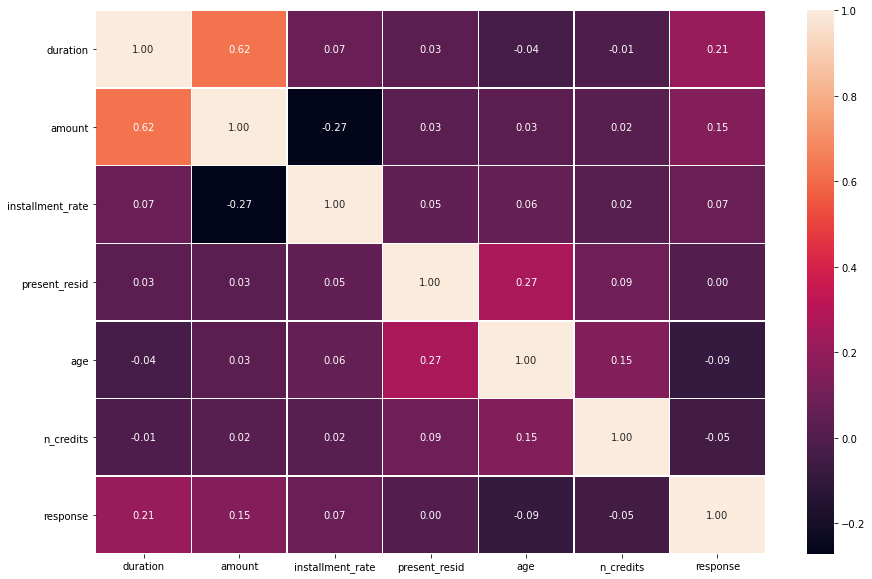

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df.corr(),
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f")

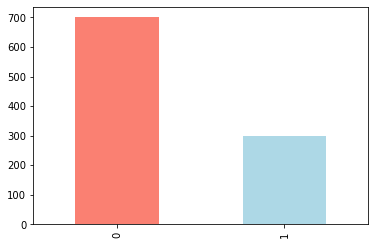

In [12]:
df["response"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);